In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pdn


In [2]:
filename = "KK_MK_2023-10-13_15-36-23.npy"
# filename = "FM_SR_2023-10-13_15-28-18.npy"
# load data
data = np.load(filename, allow_pickle=True)

In [3]:
# examine loaded data format
print(data.dtype)
print(data.shape)
print(data[0].keys())

# return:
# object
# (56,)
# dict_keys(['x1', 'x2', 'y', 't', 'rule', 'acc', 'rt'])

object
(56,)
dict_keys(['x1', 'x2', 'y', 't', 'rule', 'acc', 'rt'])


In [4]:
# get first trial
trial = data[0]
print(trial)

{'x1': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

# trial number against reaction time (time for complete this trial)

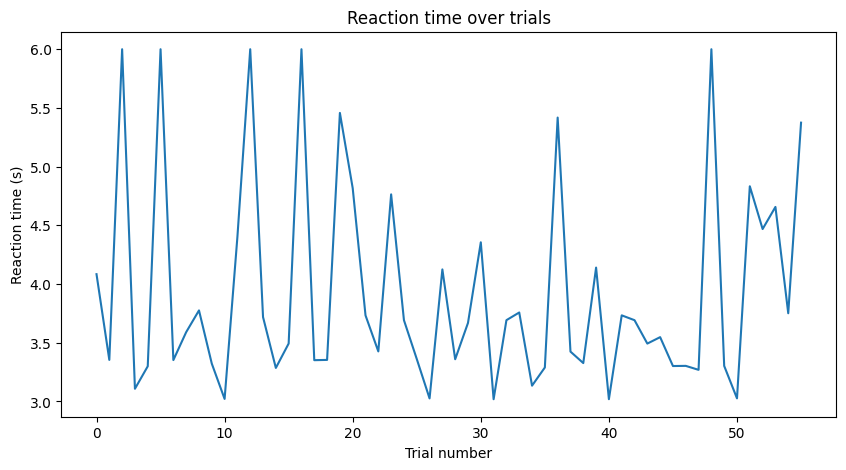

In [11]:
# get rt from all trials
rts = [trial['rt'] for trial in data]

# replace None with 6
rts = [6 if rt is None else rt for rt in rts]

# plot rts_ against trial number

# figure size = 10x5
plt.figure(figsize=(10,5))
plt.title("Reaction time over trials")
plt.xlabel("Trial number")
plt.ylabel("Reaction time (s)")
plt.plot(rts)
plt.show()




## Use moving average to smooth the data

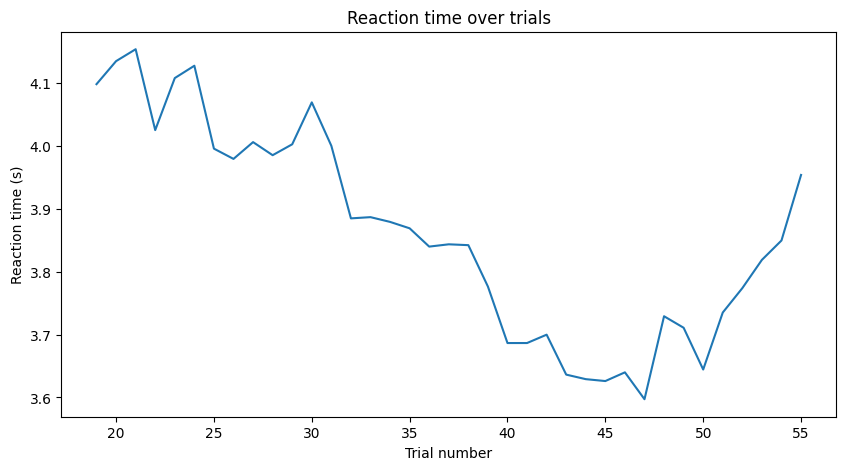

In [12]:
# moving average of rts_ with window size 20
rts_ = np.array(rts)
rts_ = pdn.Series(rts_)
rts_ = rts_.rolling(window=20).mean()
rts_ = rts_.values.tolist()

# plot rts_ against trial number
plt.figure(figsize=(10,5))
plt.title("Reaction time over trials")
plt.xlabel("Trial number")
plt.ylabel("Reaction time (s)")
plt.plot(rts_)
plt.show()



# trial number against Switch of x1 (1 to 0 or 0 to 1) 

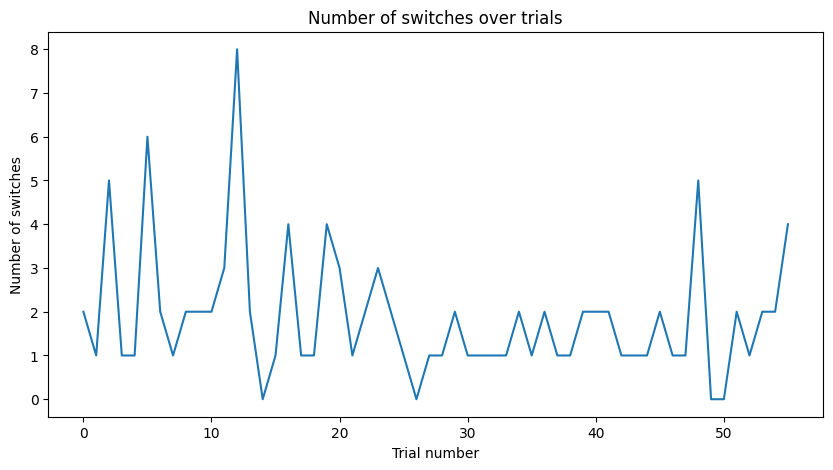

In [18]:
# compute number of switches of x1
def count_switches(x):
    return sum([1 if x[i] != x[i+1] else 0 for i in range(len(x)-1)])

n_switches = [count_switches(trial['x1']) for trial in data]

# plot n_switches against trial number
plt.figure(figsize=(10,5))
plt.plot(n_switches)
plt.title("Number of switches over trials")
plt.xlabel("Trial number")
plt.ylabel("Number of switches")
plt.show()

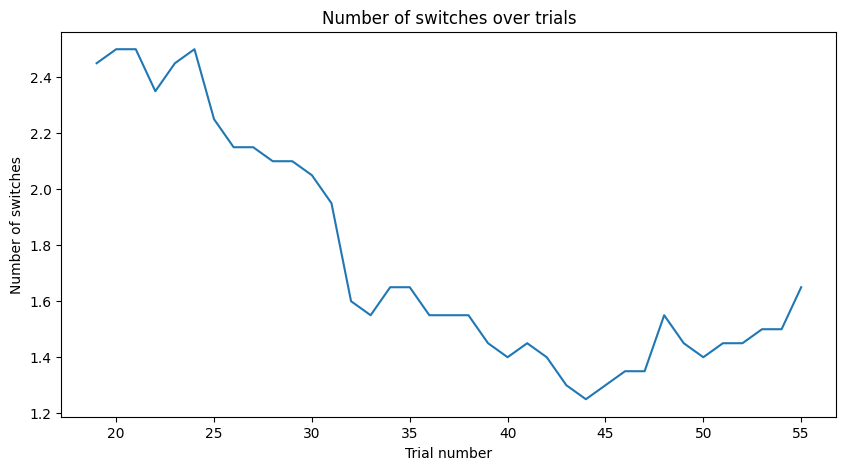

In [23]:
# compute number of switches with window size 20
n_switches_ = np.array(n_switches)
n_switches_ = pdn.Series(n_switches_)
n_switches_ = n_switches_.rolling(window=20).mean()
n_switches_ = n_switches_.values.tolist()

# plot n_switches_ against trial number
plt.figure(figsize=(10,5))
plt.plot(n_switches_)
plt.title("Number of switches over trials")
plt.xlabel("Trial number")
plt.ylabel("Number of switches")
plt.show()



# trial number against Switch of x2 (1 to 0 or 0 to 1)

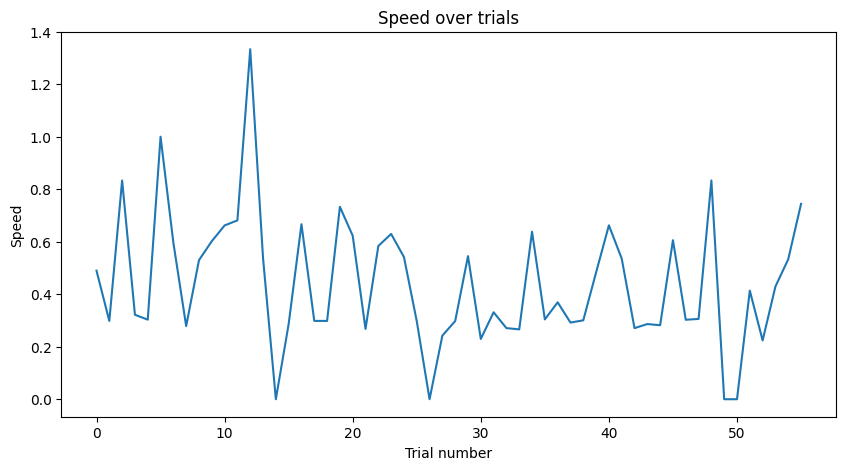

In [35]:
# compute frequency of switches of x1 using rts_
speed = np.array(n_switches) / np.array(rts_)

# plot speed against trial number
plt.figure(figsize=(10,5))
plt.plot(speed)
plt.title("Speed over trials")
plt.xlabel("Trial number")
plt.ylabel("Speed (switches/s)")
plt.show()

## Use moving average to smooth the data

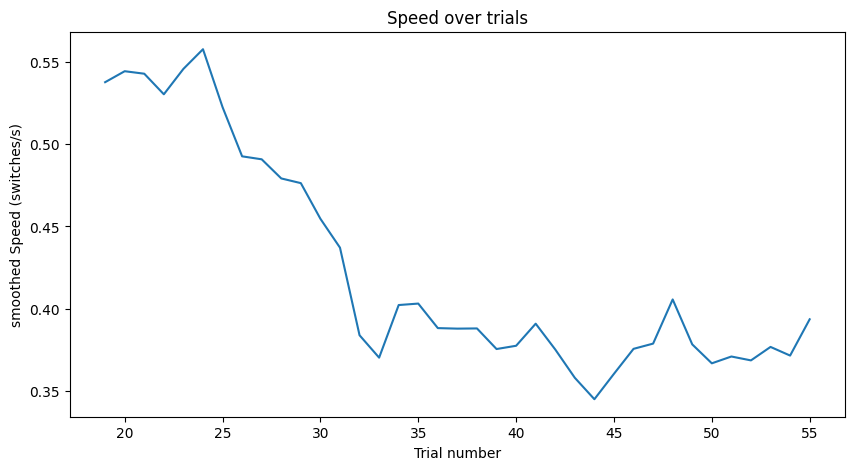

In [36]:
# moving average of speed with window size 20
speed = np.array(n_switches) / np.array(rts_)
speed = pdn.Series(speed)
speed = speed.rolling(window=20).mean()
speed = speed.values.tolist()

# plot speed against trial number
plt.figure(figsize=(10,5))
plt.plot(speed)
plt.title("Speed over trials")
plt.xlabel("Trial number")
plt.ylabel("smoothed Speed (switches/s)")
plt.show()

# The impact of rule

In [30]:
# count 1 in rule
# e.g., trial['rule'] = '1000'

def count_1s(rule):
    return sum([1 if r == '1' else 0 for r in rule])

n_1s = [count_1s(trial['rule']) for trial in data]

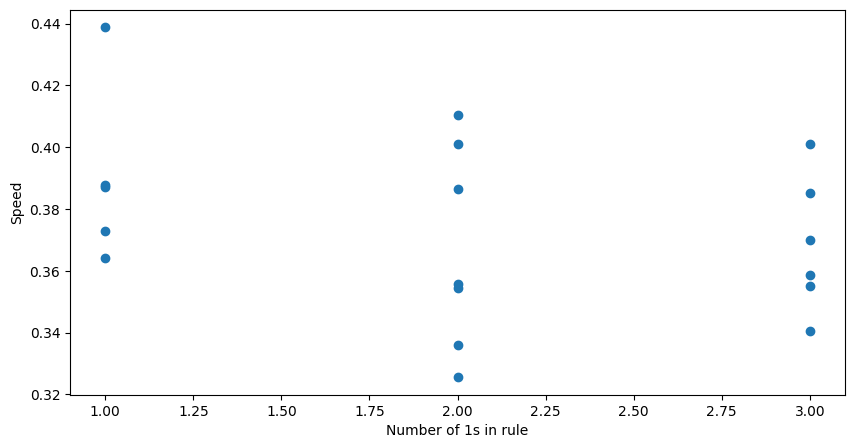

In [32]:
# plot x is rule_1 and y is speed
plt.figure(figsize=(10,5))
plt.scatter(n_1s, speed)
plt.xlabel("Number of 1s in rule")
plt.ylabel("Speed")
plt.show()